<a href="https://colab.research.google.com/github/shiz-107/Hackathone-AI-for-connectivity/blob/main/AI_connectivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Creating sample dataset...

Sample dataset:
         date  network_health_score  failure_status
0  2025-01-20                    85               0
1  2025-01-21                    70               0
2  2025-01-22                    60               1
3  2025-01-23                    90               0
4  2025-01-24                    40               1
5  2025-01-25                    75               0
6  2025-01-26                    55               1
7  2025-01-27                    95               0
8  2025-01-28                    45               1
9  2025-01-29                    50               1

Model training completed!

Accuracy of the model: 1.00

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.0

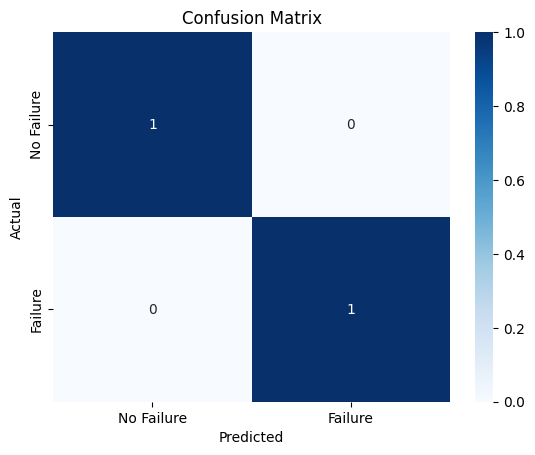

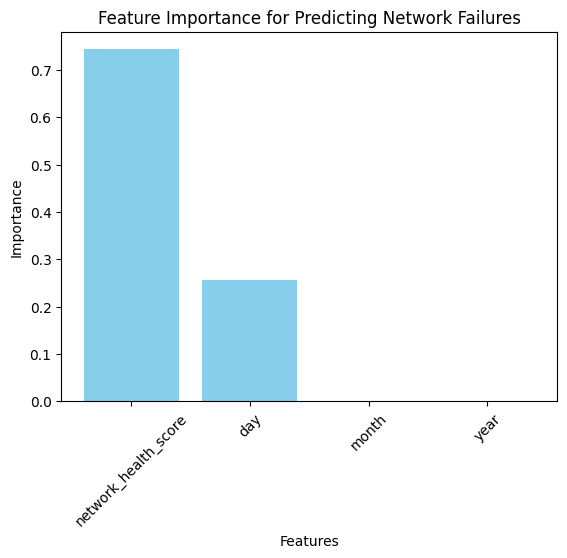


Model saved as 'network_failure_model.pkl'!


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create the dataset
print("Creating sample dataset...")
sample_data = {
    "date": ["2025-01-20", "2025-01-21", "2025-01-22", "2025-01-23", "2025-01-24",
             "2025-01-25", "2025-01-26", "2025-01-27", "2025-01-28", "2025-01-29"],
    "network_health_score": [85, 70, 60, 90, 40, 75, 55, 95, 45, 50],
    "failure_status": [0, 0, 1, 0, 1, 0, 1, 0, 1, 1],
}

# Create DataFrame
data = pd.DataFrame(sample_data)
print("\nSample dataset:")
print(data)

# Step 2: Preprocess the data
# Convert date to numerical features (day, month, year)
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Drop the original date column
data = data.drop(['date'], axis=1)

# Separate features and target
X = data.drop('failure_status', axis=1)  # Features
y = data['failure_status']               # Target

# Step 3: Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Train the machine learning model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)
print("\nModel training completed!")

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy of the model: {accuracy:.2f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix Visualization
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Failure', 'Failure'], yticklabels=['No Failure', 'Failure'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 7: Feature Importance Visualization
importance = model.feature_importances_
plt.bar(X.columns, importance, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance for Predicting Network Failures')
plt.xticks(rotation=45)
plt.show()

# Step 8: Save the model (optional)
import joblib
joblib.dump(model, "network_failure_model.pkl")
print("\nModel saved as 'network_failure_model.pkl'!")

